### FAST

In [17]:
'''
КРБО-01-21
Толчев, Еличев, Кайлачаков
Информационные элементы робототехнических систем 
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def Fast_tree(img, x, y, threshold):
    center = img[y, x]
    # порог интенсивности
    lower_threshold = center - threshold
    upper_threshold = center + threshold

    positions = [(0, -3), (1, -3), (2, -2), (3, -1), (3, 0), (3, 1), (2, 2), (1, 3), (0, 3), (-1, 3), (-2, 2), (-3, 1),
                 (-3, 0), (-3, -1), (-2, -2), (-1, -3)]
    # счетчик яркости
    brighter_count = 0
    darker_count = 0

    for dx, dy in positions:
        if img[y + dy, x + dx] >= upper_threshold:
            brighter_count += 1
            if brighter_count >= 12:
                return True
        elif img[y + dy, x + dx] <= lower_threshold:
            darker_count += 1
            if darker_count >= 12:
                return True

    return False

In [19]:
def find_keypoints(img, threshold):
    keypoints = []
    height, width = img.shape
    for y in range(3, height - 3):
        for x in range(3, width - 3):
            if Fast_tree(img, x, y, threshold):
                keypoints.append((x, y))

    return keypoints

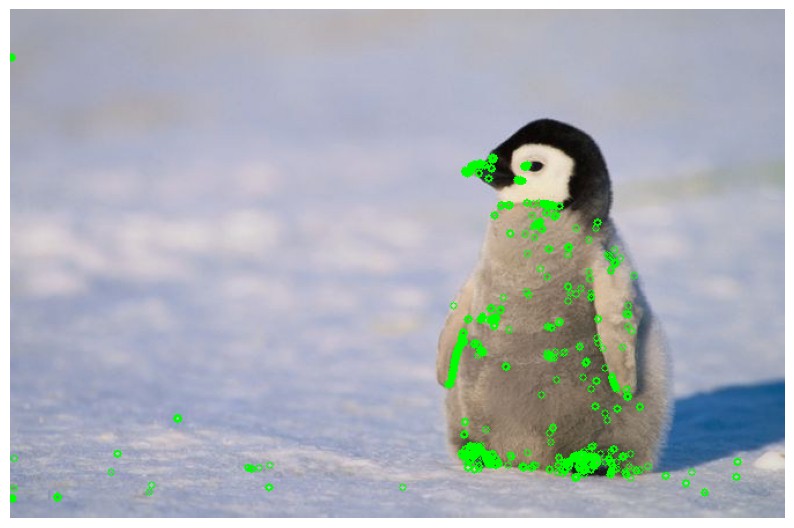

In [30]:
image_color = cv2.imread('penquinchiks.jpeg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
keypoints = find_keypoints(image_gray, 20)

for point in keypoints:
    cv2.circle(image_color, point, 3, (0, 255, 0), 1)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.plot(point, 'o', color='lime', markersize=5)
plt.axis('off')
plt.show()

### ORB

In [25]:
def detect_keypoints(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    return keypoints


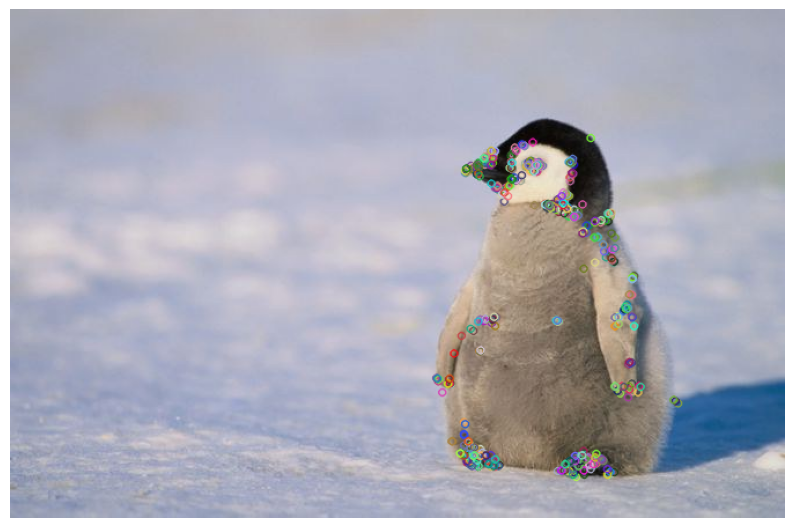

In [28]:
image = cv2.imread('penquinchiks.jpeg')
keypoints = detect_keypoints(image)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)



plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()